In [757]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [758]:
def getMatrix(n, p):
    claster = np.full((n, n), 0);

    for j in range(n):
        for i in range(n):
            alpha = np.random.random();
            if alpha <= p:
                claster[i,j] = 1;
    return claster;

def findFreeParent(children, labels):
    while True:
        parent = int(labels[children]);
        if parent == 0:
            return children;

        children = parent;

def hkAlgorithm(matrix, n):
    largestLabel = 1;
    labels = np.zeros(n*n);

    for y in range(n):
        for x in range(n):

            if matrix[y, x] == 0:
                continue;

            left = int(matrix[y, x - 1] if x != 0 else 0);
            above = int(matrix[y - 1, x] if y != 0 else 0);

            if left == 0 and above == 0:
                largestLabel = largestLabel + 1;
                matrix[y, x] = largestLabel;
            elif left == above:
                matrix[y, x] = left;
            elif left != 0 and above == 0:
                matrix[y, x] = left;
            elif left == 0 and above != 0:
                matrix[y, x] = above;
            else:
                leftParent = findFreeParent(left, labels);
                aboveParent = findFreeParent(above, labels);
                if leftParent == aboveParent:
                    matrix[y, x] = leftParent;
                else:
                    smallLabel = leftParent if leftParent < aboveParent else aboveParent;
                    bigLabel = leftParent if leftParent > aboveParent else aboveParent;
                    matrix[y, x] = smallLabel;
                    labels[bigLabel] = smallLabel;
     
    for y in range(n):
        for x in range(n):
            label = int(matrix[y, x]);
            if label == 0 or labels[label] == 0:
                continue;

            label = findFreeParent(label, labels);
            matrix[y, x] = label;
                

    return matrix;

# Пробой считаем, если есть пересечение сверху вниз (и наоборот)
def findBreakdown(matrix, n):    
    upLabels = matrix[0];
    downLabels = matrix[-1];
    upLabels = np.unique(upLabels[upLabels > 0]);
    downLabels = np.unique(downLabels[downLabels > 0]);
    return np.intersect1d(upLabels, downLabels);

In [759]:
def getValues(l, p):
    n = 500;    
    pInf = np.zeros(n);
    Ns = np.zeros(l*l);
    s = np.zeros(n);

    for i in range(n):
        m = getMatrix(l, p);
        labelM = hkAlgorithm(m.copy(), l);
        connectingLabels = findBreakdown(labelM, l);

        sizeConnectingClaster = 0;
        for num in connectingLabels:
            sizeConnectingClaster += labelM[labelM == num].shape[0];
                        
        pInf[i] = sizeConnectingClaster / labelM[labelM > 0].shape[0];          

        labels, labelcounts = np.unique(labelM[labelM > 0], return_counts=True);
        d = dict(zip(labels, labelcounts));
        for key, value in d.items():
            if key in connectingLabels:
                continue;
            Ns[int(value)] += 1;
            
    Ns = Ns / (l * n);
    
    firstS = 0;
    secondS = 0;
    for i in range(Ns.size):
        firstS += i * Ns[i];
        secondS += i * i * Ns[i];
    
    s = secondS / firstS;
         
    
    return (pInf.mean(), s.mean(), Ns);

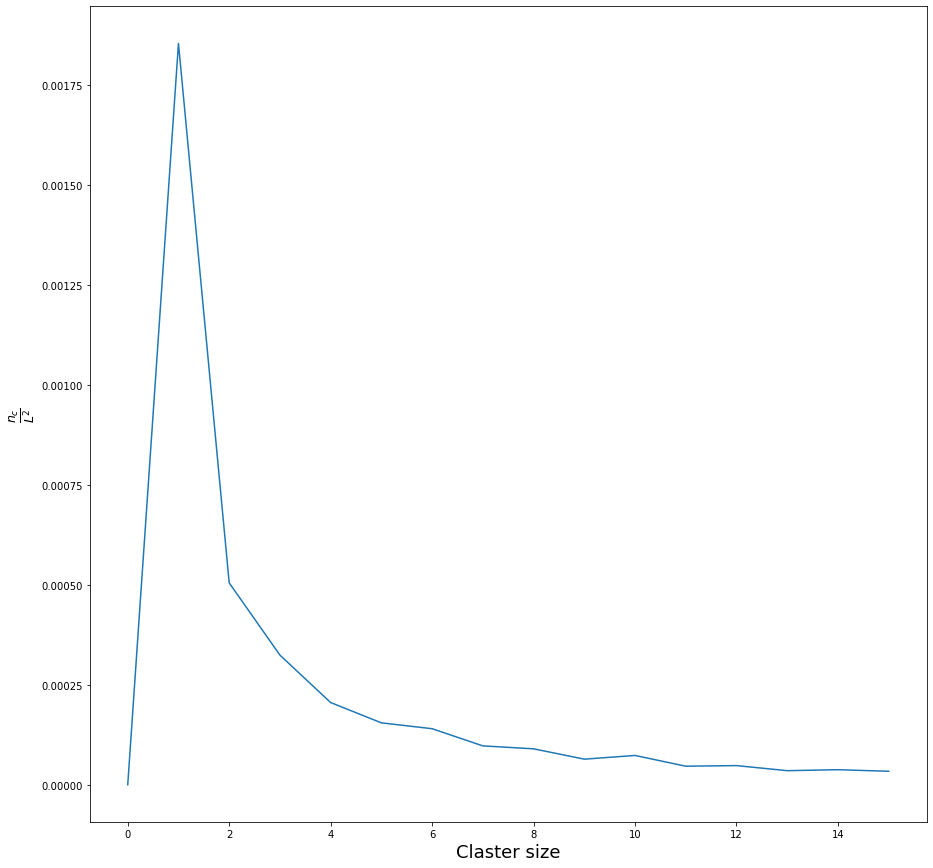

L = 16, Pinf = 0.1690592664088584, s = 31.387443205287063, p = 0.55




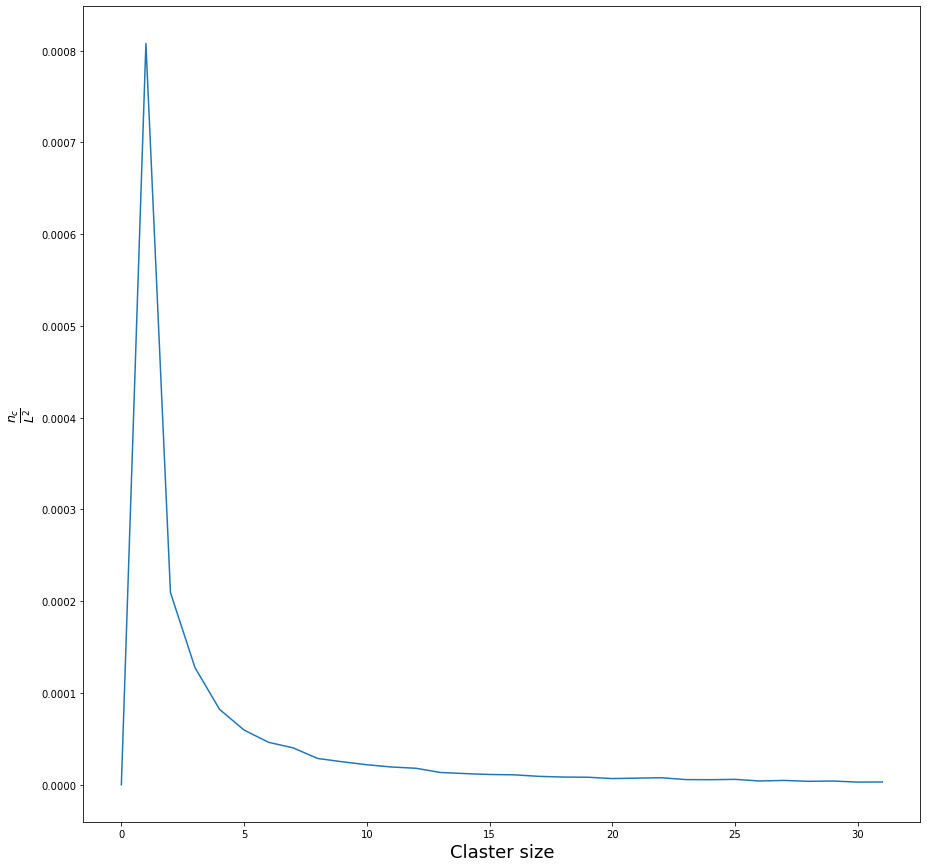

L = 32, Pinf = 0.05719260149817069, s = 79.1862109472067, p = 0.55




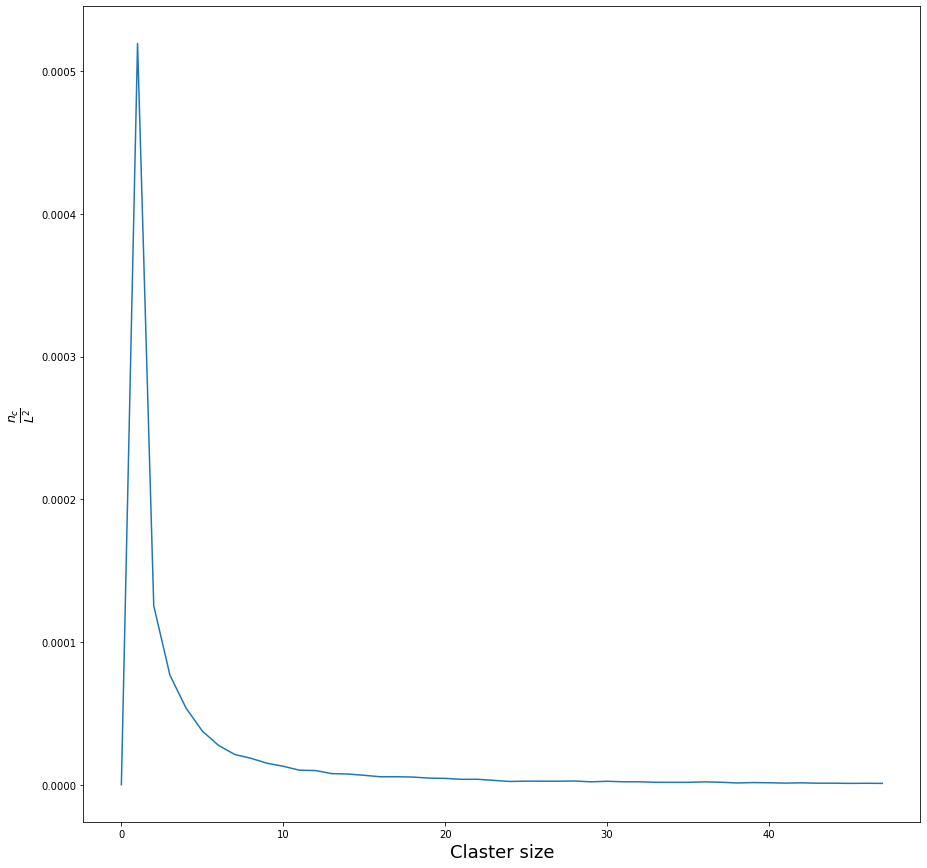

L = 48, Pinf = 0.027742332418637914, s = 123.48639312084018, p = 0.55




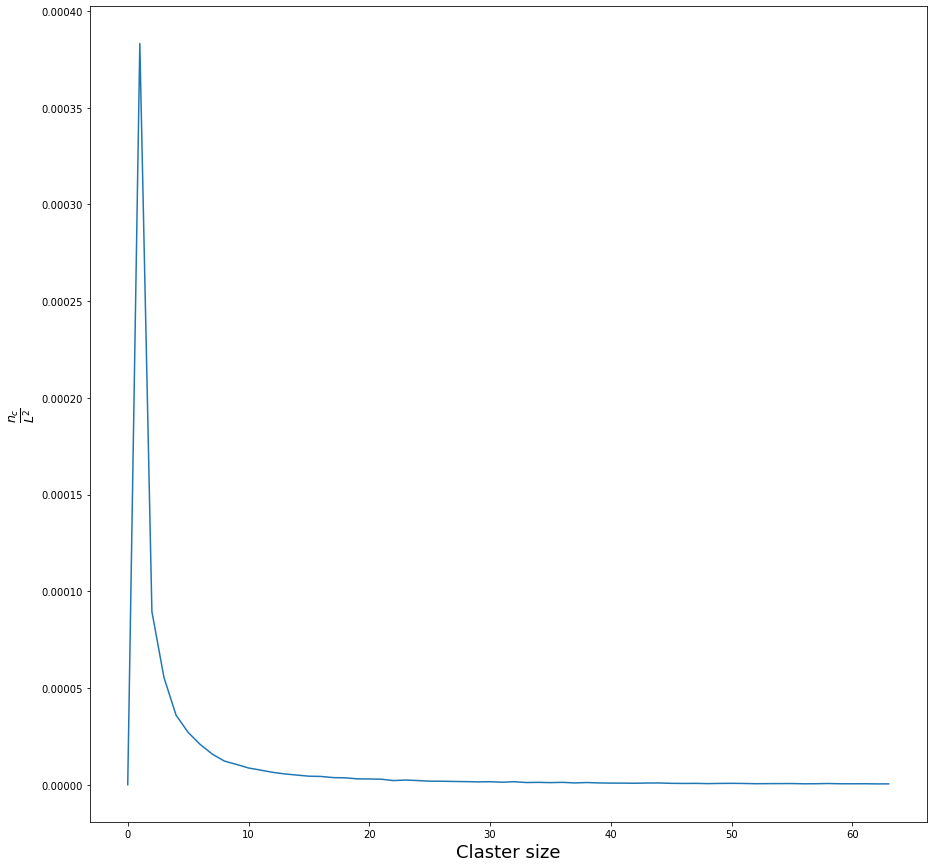

L = 64, Pinf = 0.013518945881871997, s = 165.43841655161478, p = 0.55




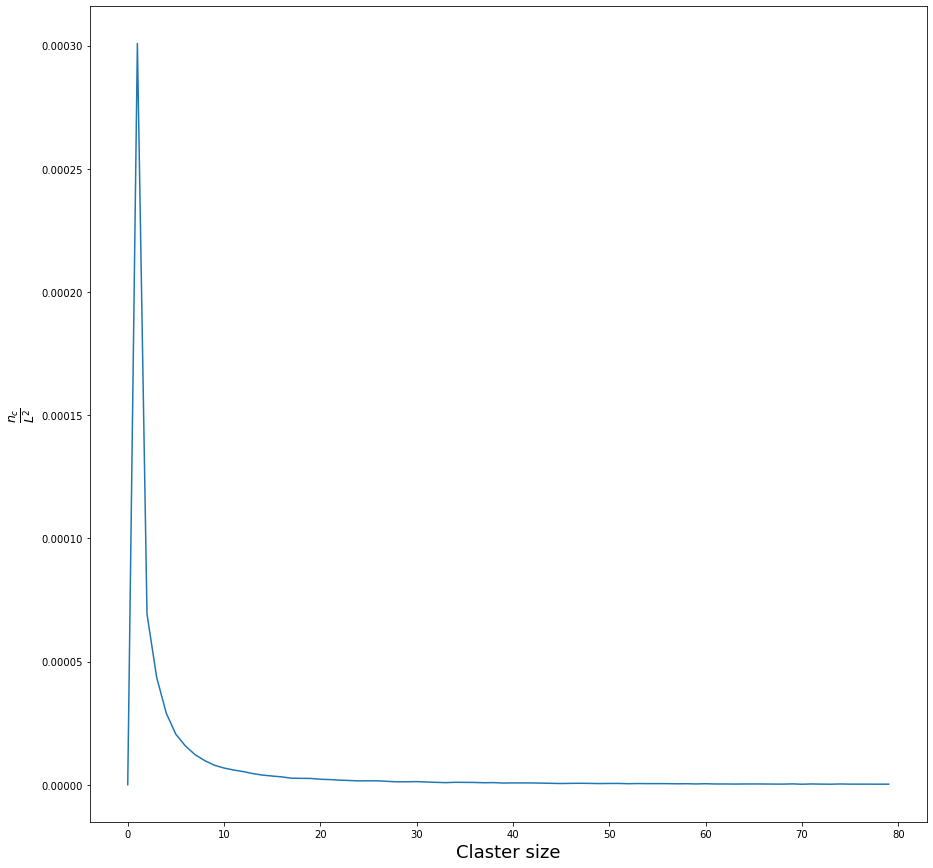

L = 80, Pinf = 0.0060628669116951014, s = 186.51743515775925, p = 0.55




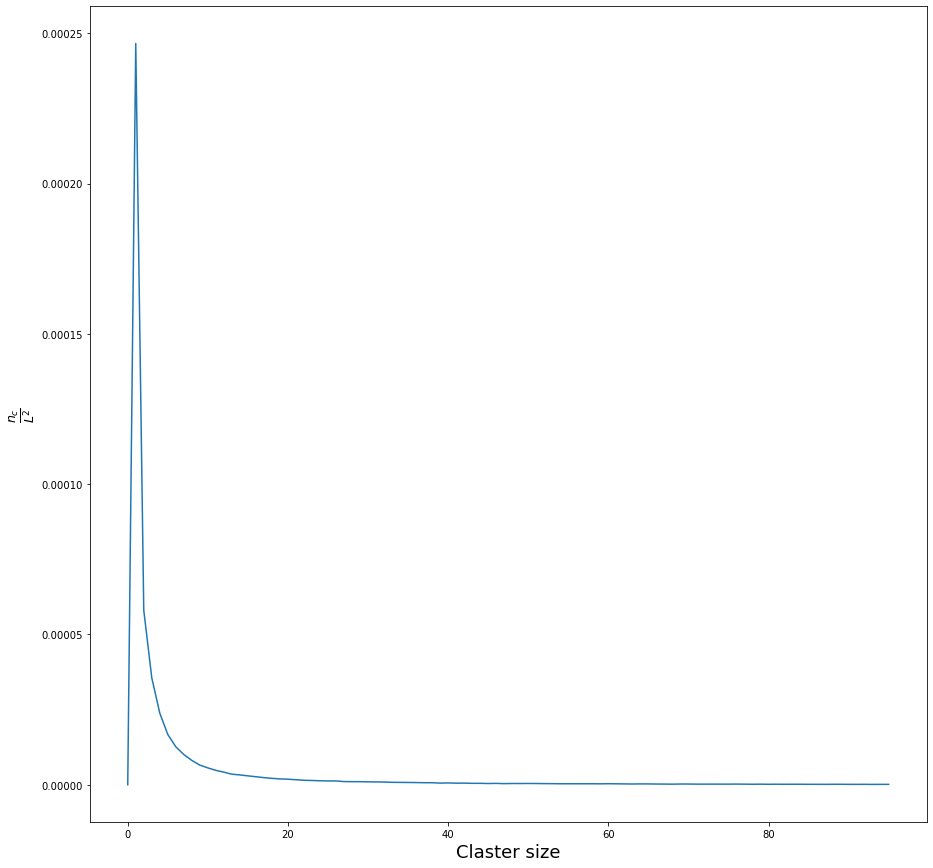

L = 96, Pinf = 0.0013710309070694277, s = 209.86901964877242, p = 0.55




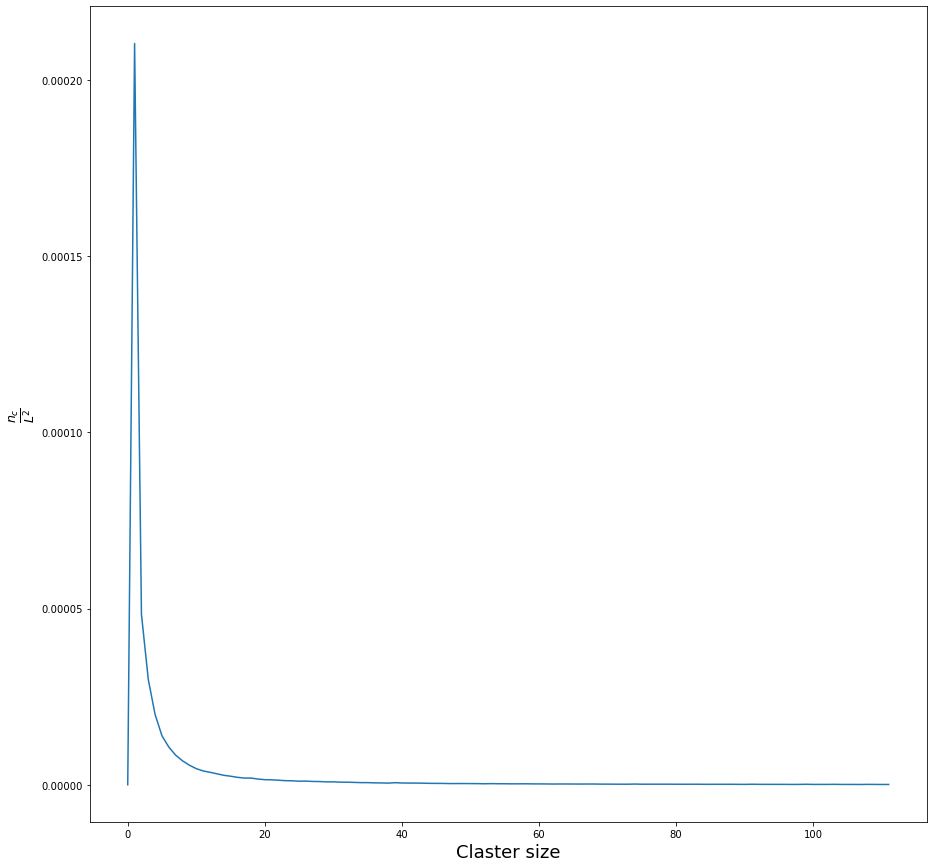

L = 112, Pinf = 0.0004246357997980672, s = 229.47711027895312, p = 0.55




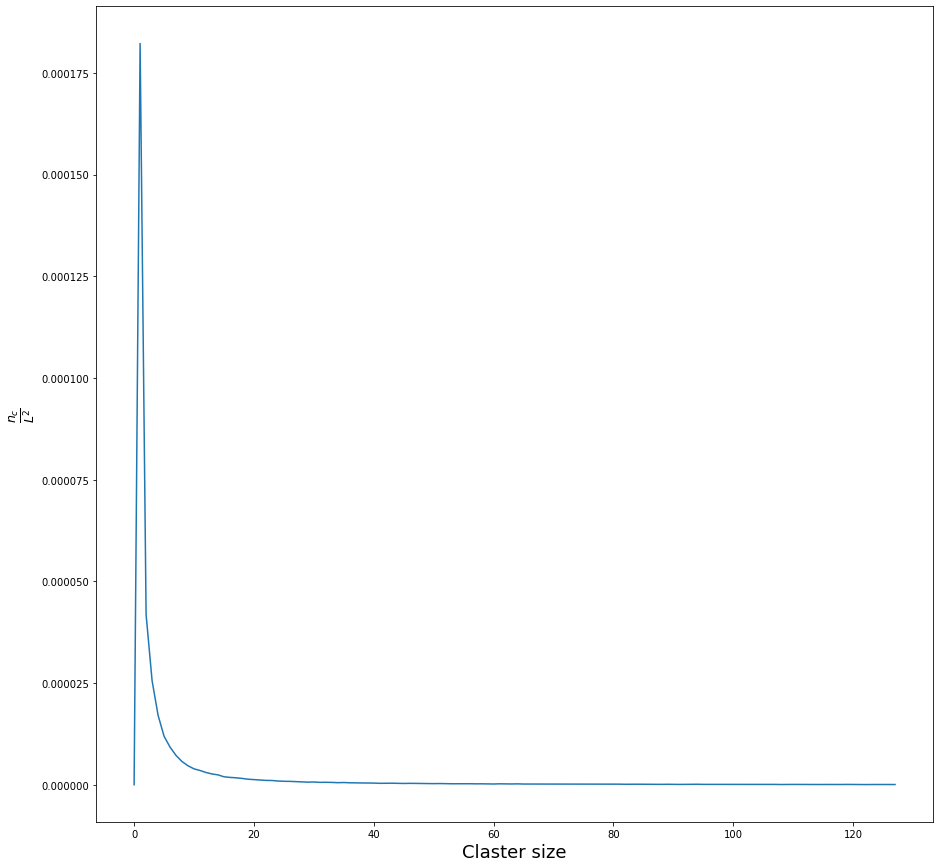

L = 128, Pinf = 0.0003795958926796953, s = 253.23312259064127, p = 0.55




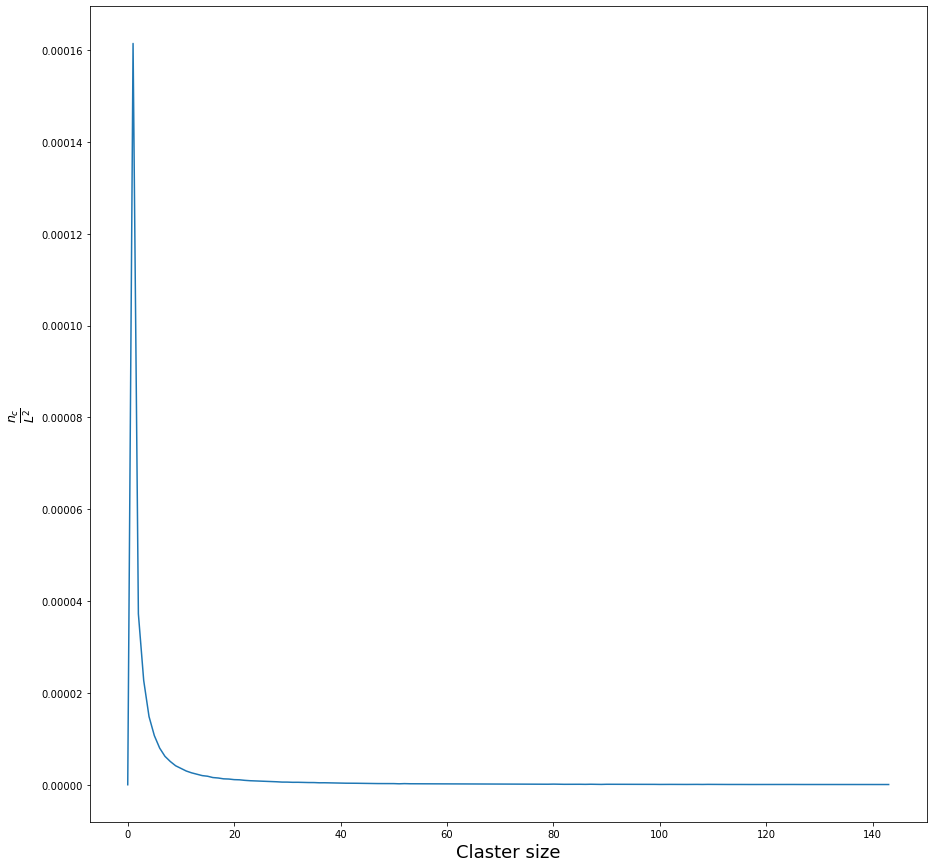

L = 144, Pinf = 0.000284919116368064, s = 253.76479927230295, p = 0.55




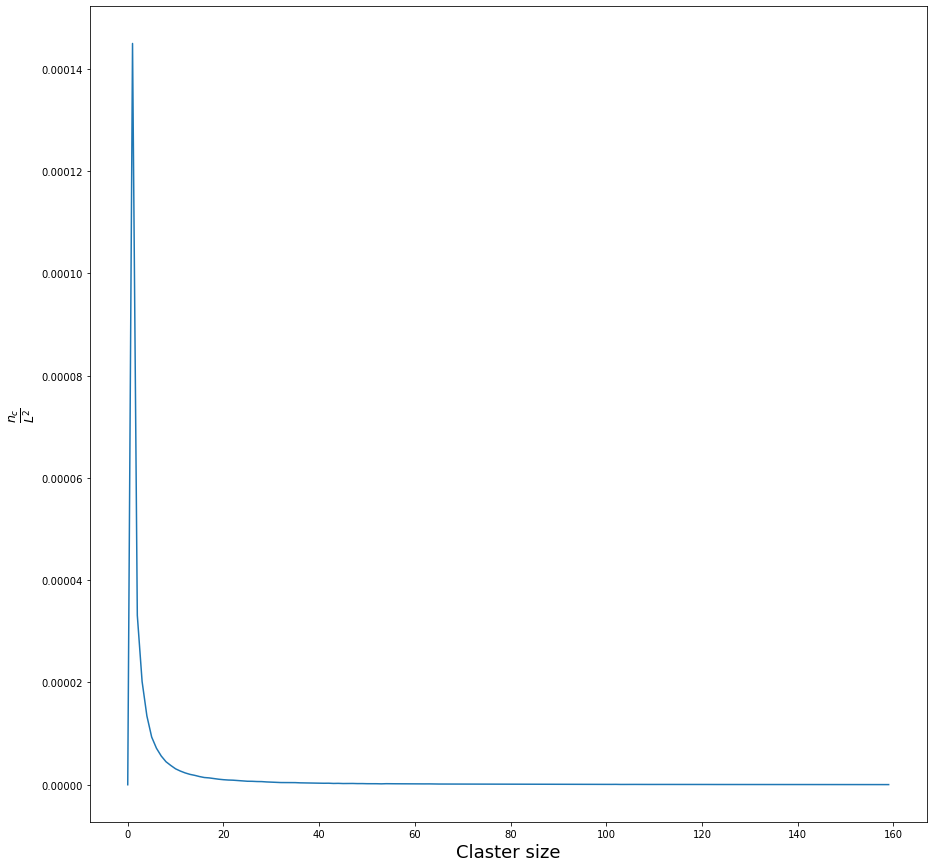

L = 160, Pinf = 0.0, s = 262.71708996155235, p = 0.55




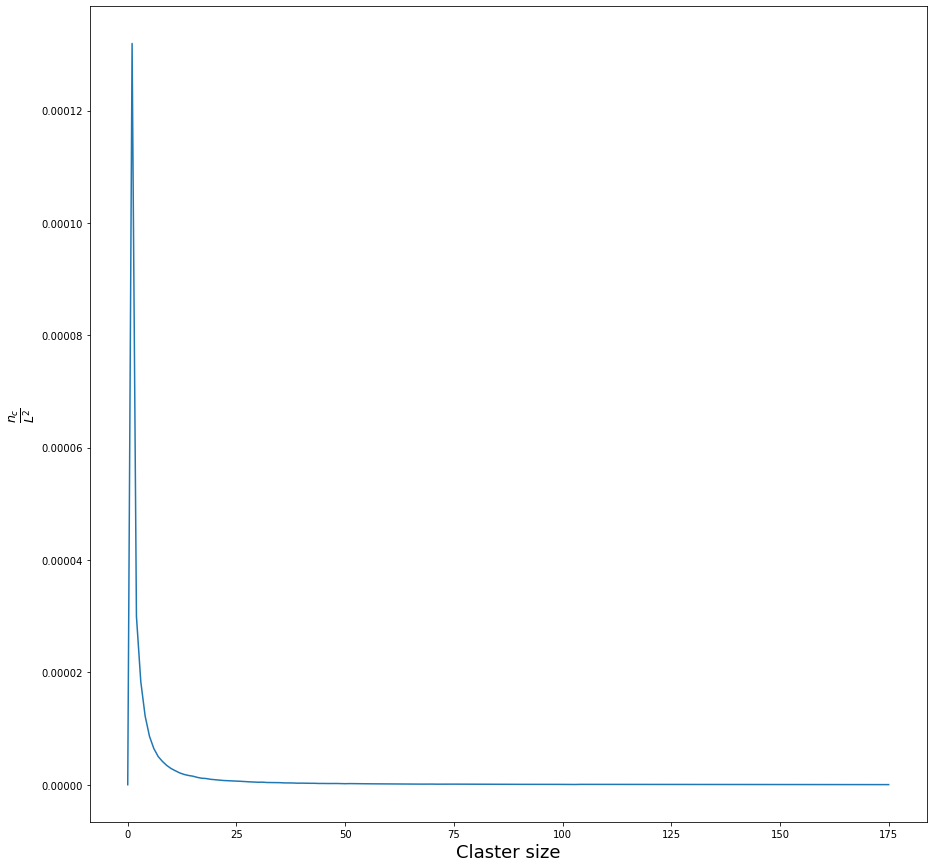

L = 176, Pinf = 0.0, s = 267.05257255369065, p = 0.55




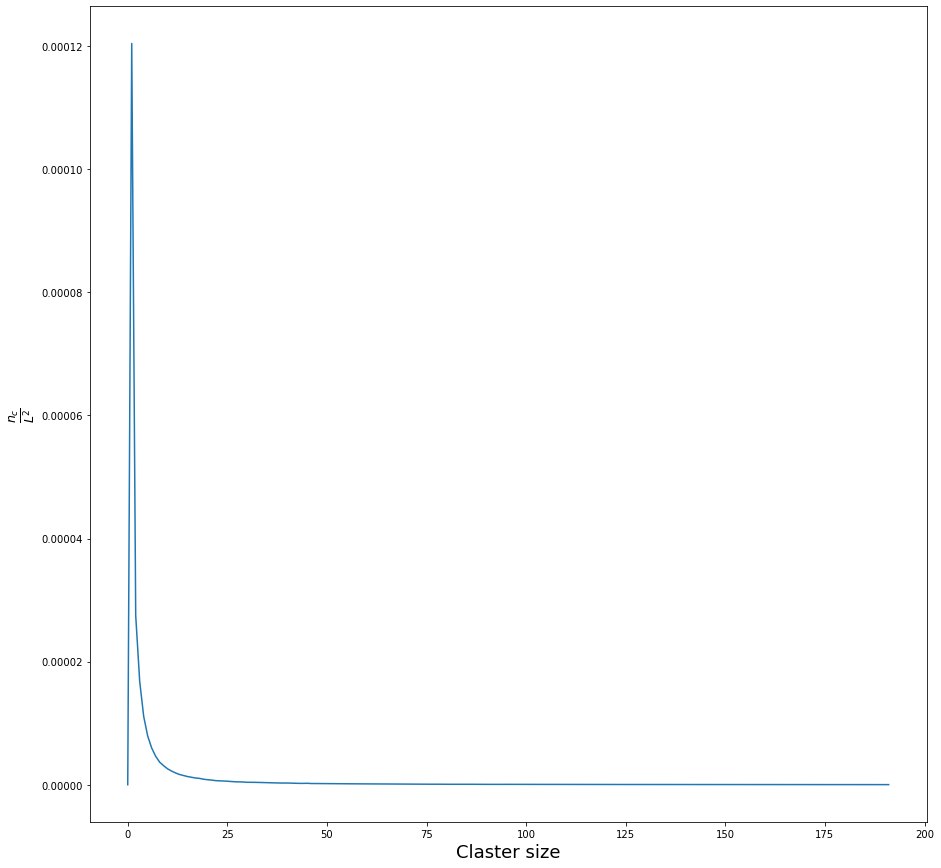

L = 192, Pinf = 0.0, s = 270.03452637934566, p = 0.55




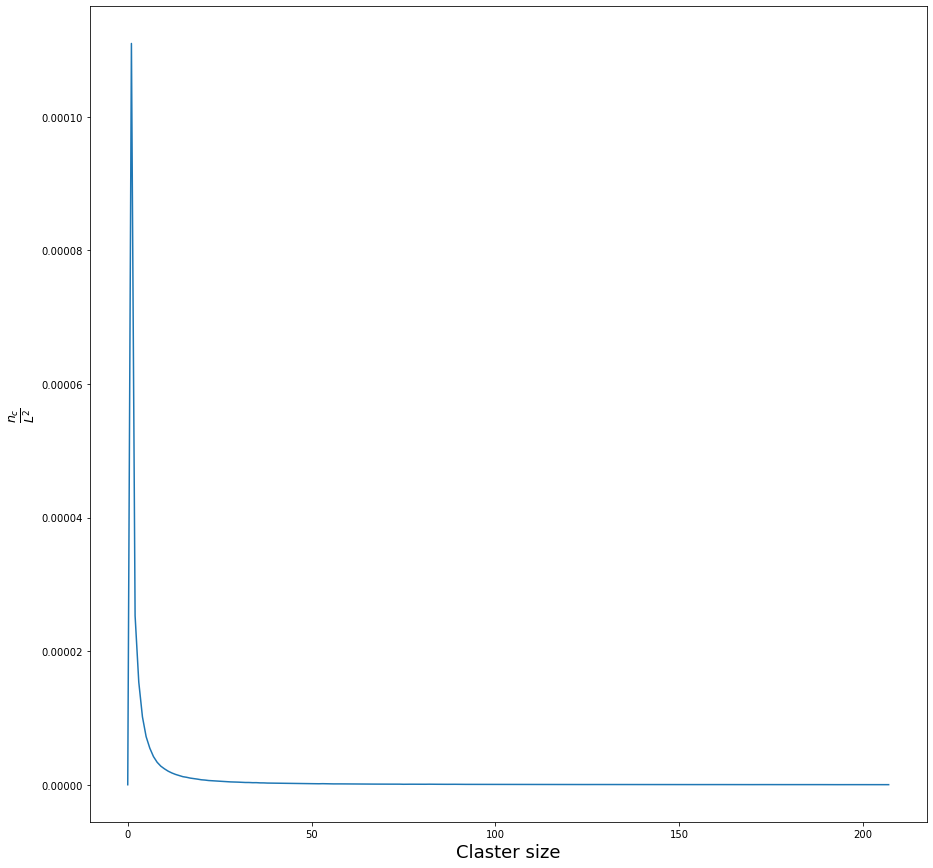

L = 208, Pinf = 0.0, s = 273.0752402594428, p = 0.55




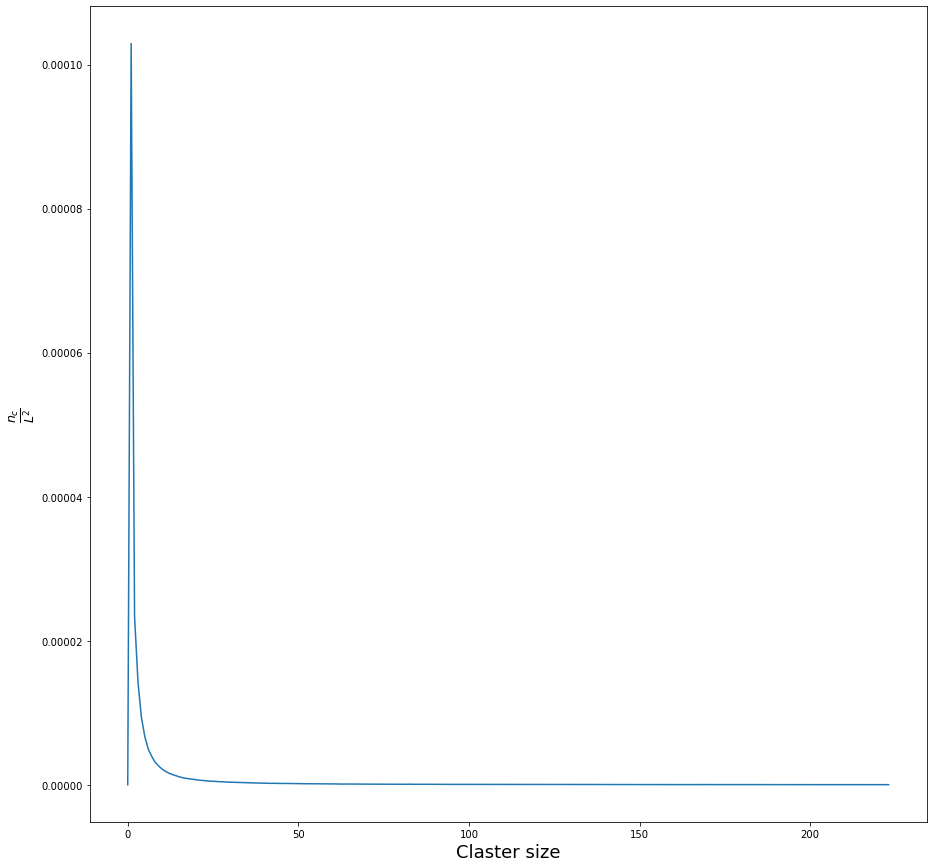

L = 224, Pinf = 0.0, s = 285.3729447994636, p = 0.55




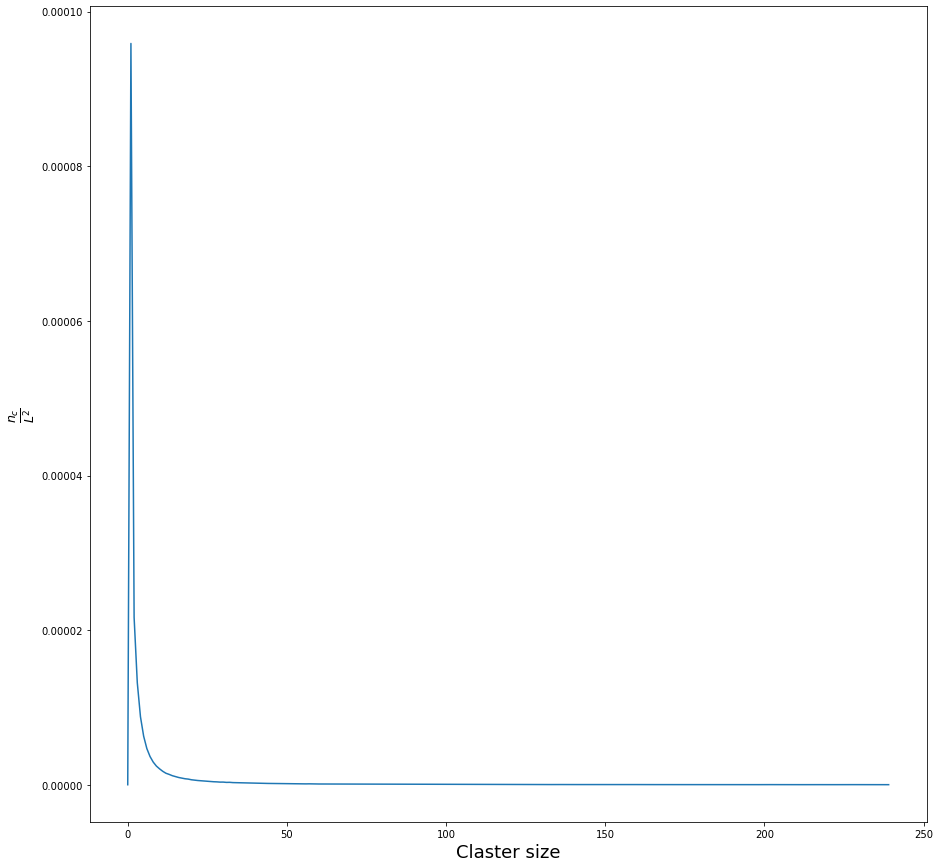

L = 240, Pinf = 0.0, s = 280.10034576647706, p = 0.55




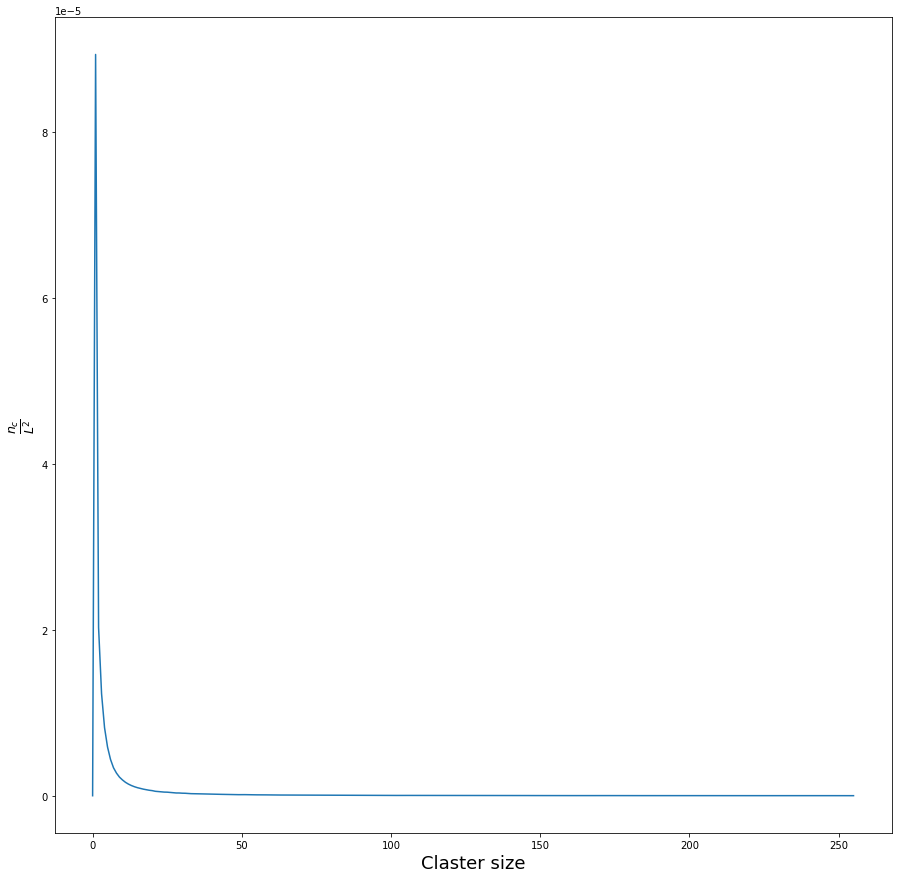

L = 256, Pinf = 0.0, s = 292.1334135029491, p = 0.55




In [760]:
pLChage = 0.55;
lArray = np.arange(16, 257, 16);
sArrayLChange = [];
pInfArrayLChange = [];
NsLChange = [];

def lChage():
    global sArrayLChange;
    global pInfArrayLChange;
    global NsLChange;

    for l in lArray:
        pInf, s, Ns = getValues(l, pLChage);
        Ns = Ns / (l**2);        
        sArrayLChange.append(s);
        pInfArrayLChange.append(pInf);
        NsLChange.append(Ns);


        fig, ax = plt.subplots();
        fig.set_figwidth(15);
        fig.set_figheight(15);
        ax.set_xlabel("Claster size", fontsize=18);    
        ax.set_ylabel("$\\frac{n_c}{L^2}$", fontsize=18);
        ax.plot(np.arange(0, l), Ns[0:l]);
        plt.show();  
        print("L = {}, Pinf = {}, s = {}, p = {}\n\n".format(l, pInf, s, pLChage));
    
    sArrayLChange = np.array(sArrayLChange);
    pInfArrayLChange = np.array(pInfArrayLChange);

    return;
    
lChage();

p = 0.55




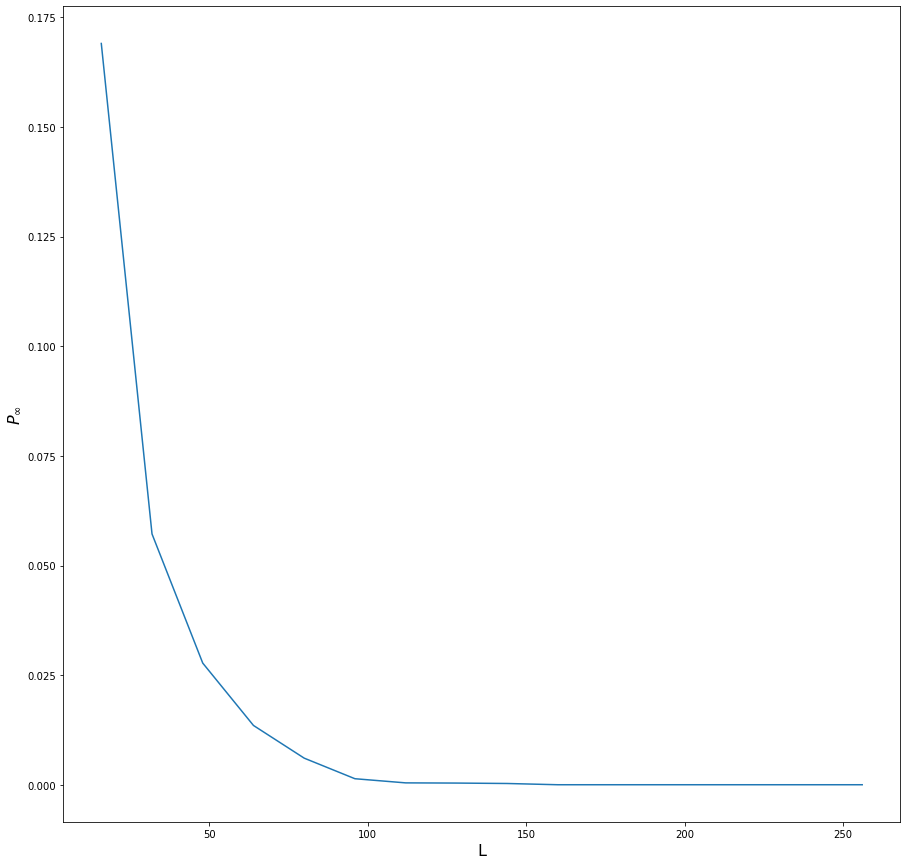

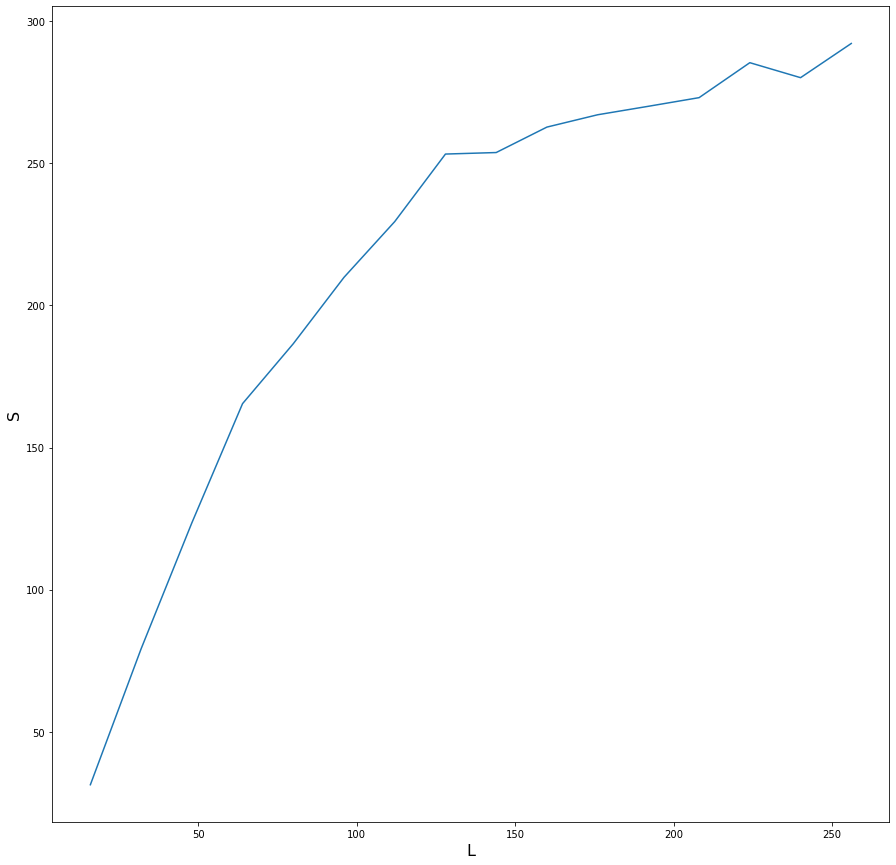

In [761]:
print("p = {}\n\n".format(pLChage));
plt.figure(figsize=(15, 15));
plt.xlabel("L", fontsize=16);
plt.ylabel("$P_{\infty}$", fontsize=16);
plt.plot(lArray, pInfArrayLChange);
plt.figure(figsize=(15,15));
plt.xlabel("L", fontsize=16);
plt.ylabel("S", fontsize=16);
plt.plot(lArray, sArrayLChange);

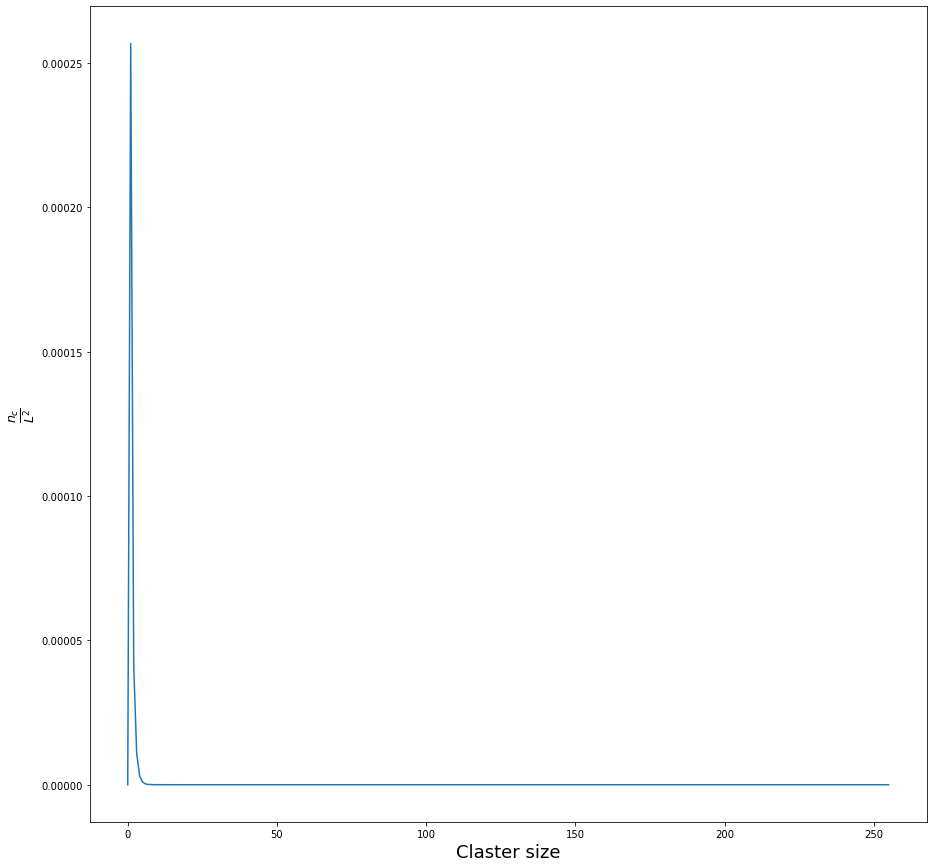

L = 256, Pinf = 0.0, s = 1.5485264583411513, p = 0.1




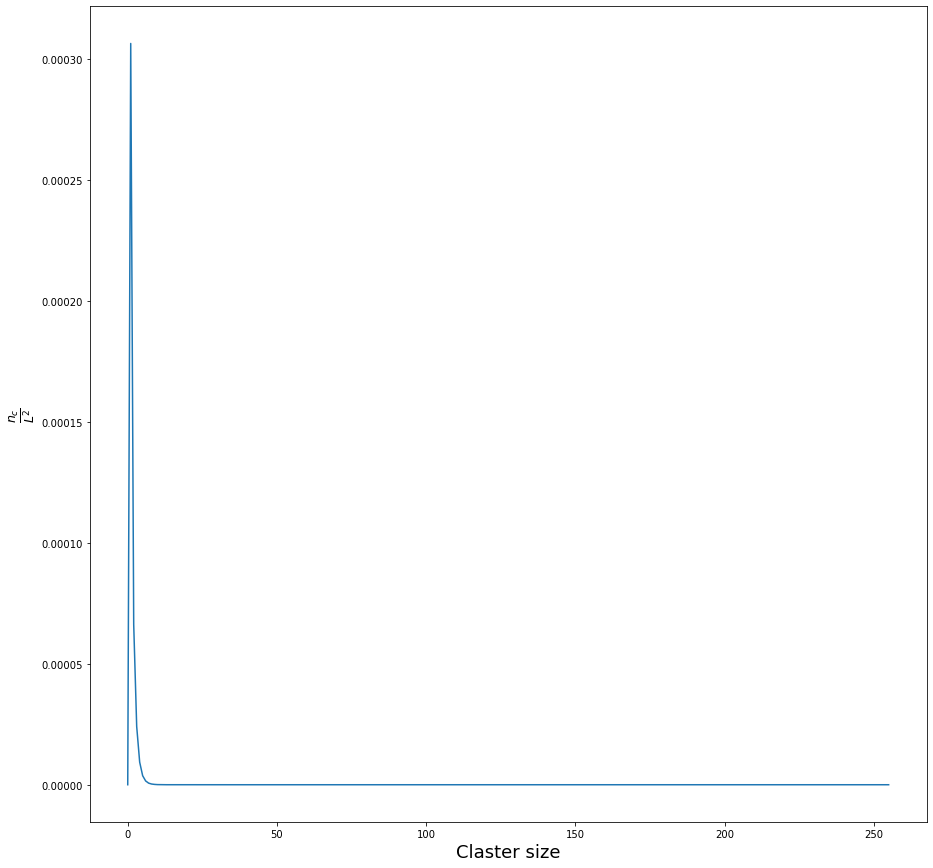

L = 256, Pinf = 0.0, s = 1.9829340936541904, p = 0.15000000000000002




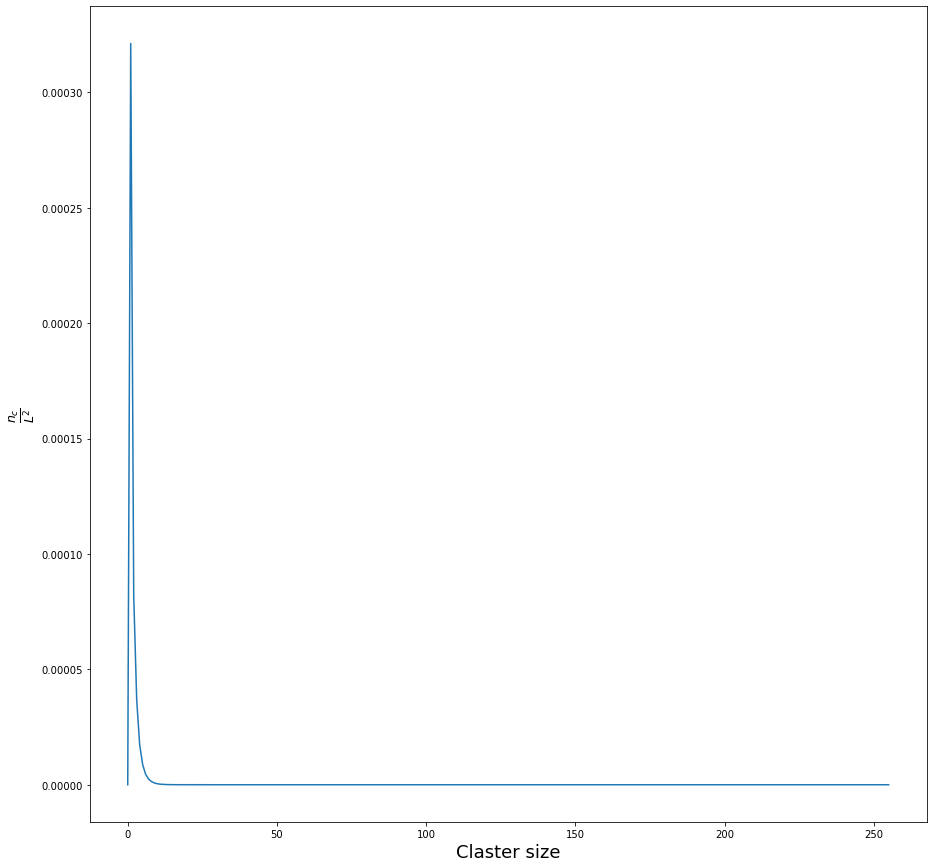

L = 256, Pinf = 0.0, s = 2.600137868551582, p = 0.20000000000000004




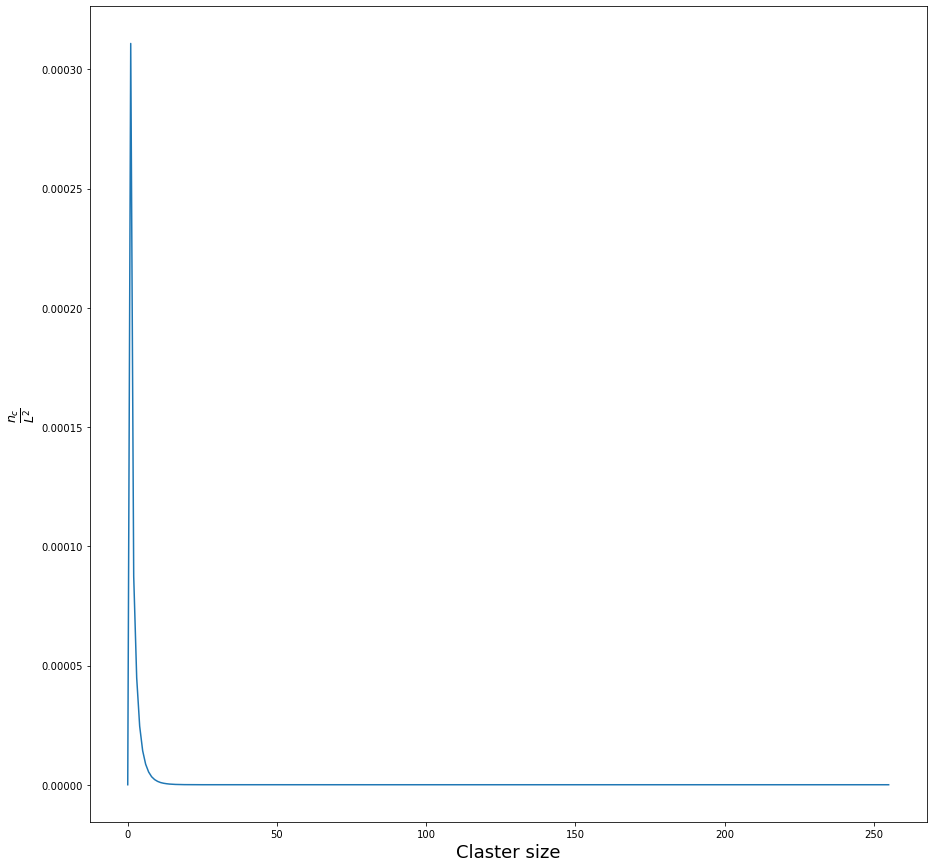

L = 256, Pinf = 0.0, s = 3.513590975699527, p = 0.25000000000000006




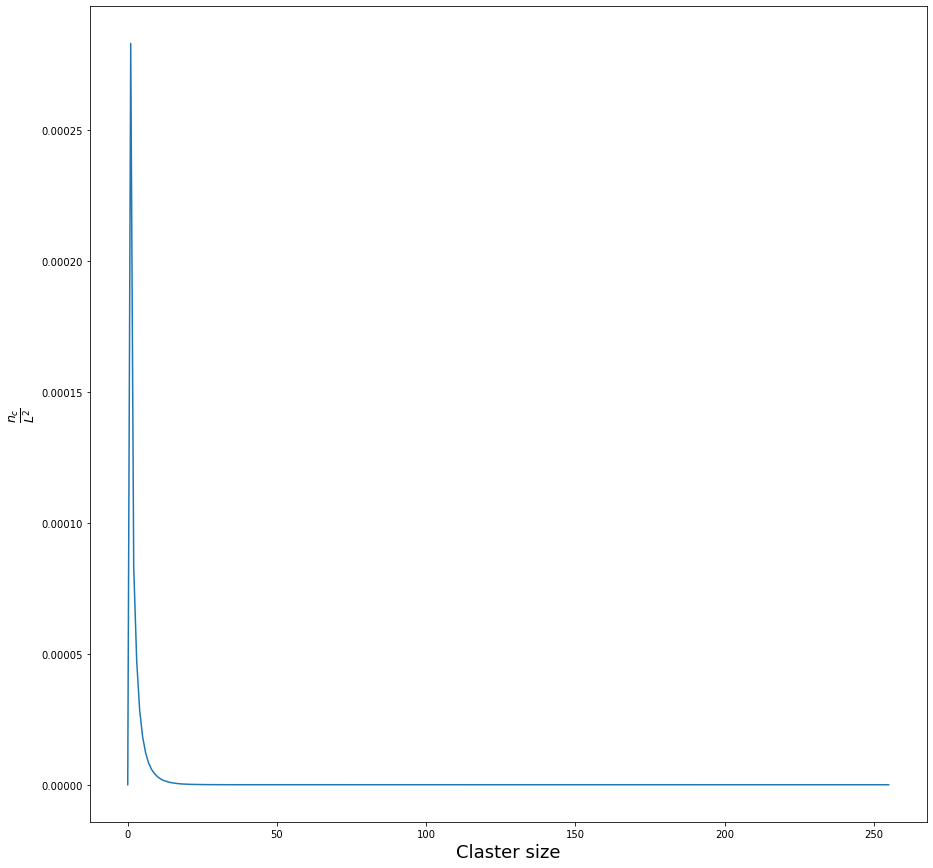

L = 256, Pinf = 0.0, s = 4.948350843812171, p = 0.30000000000000004




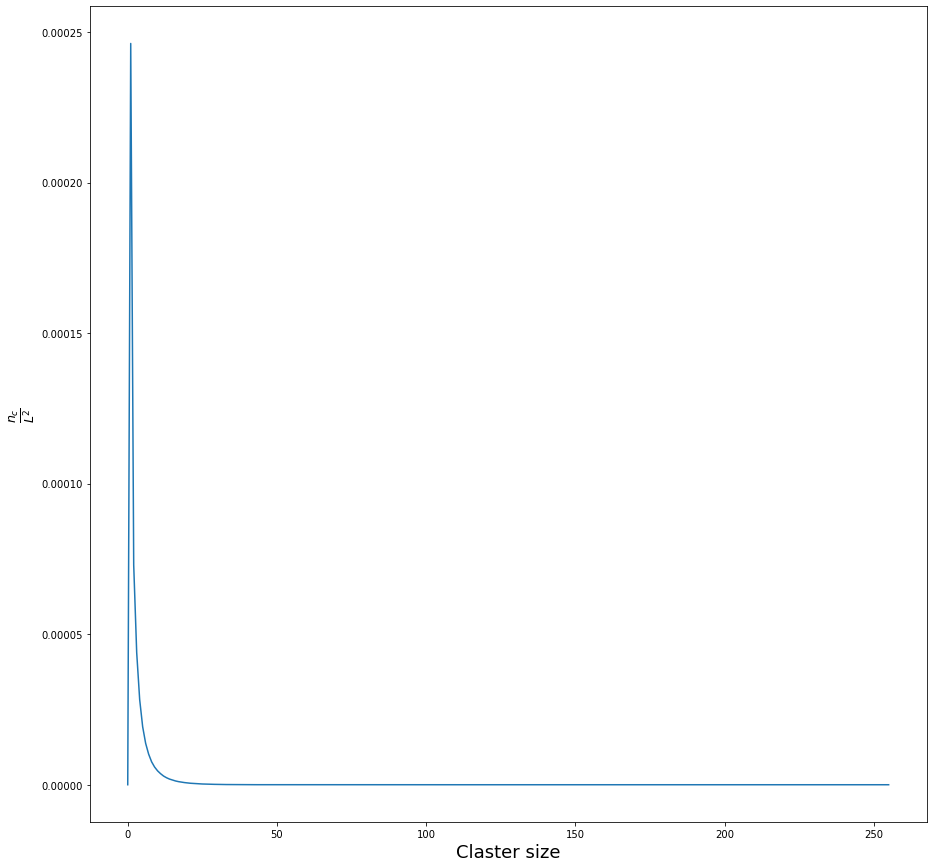

L = 256, Pinf = 0.0, s = 7.396629957264285, p = 0.3500000000000001




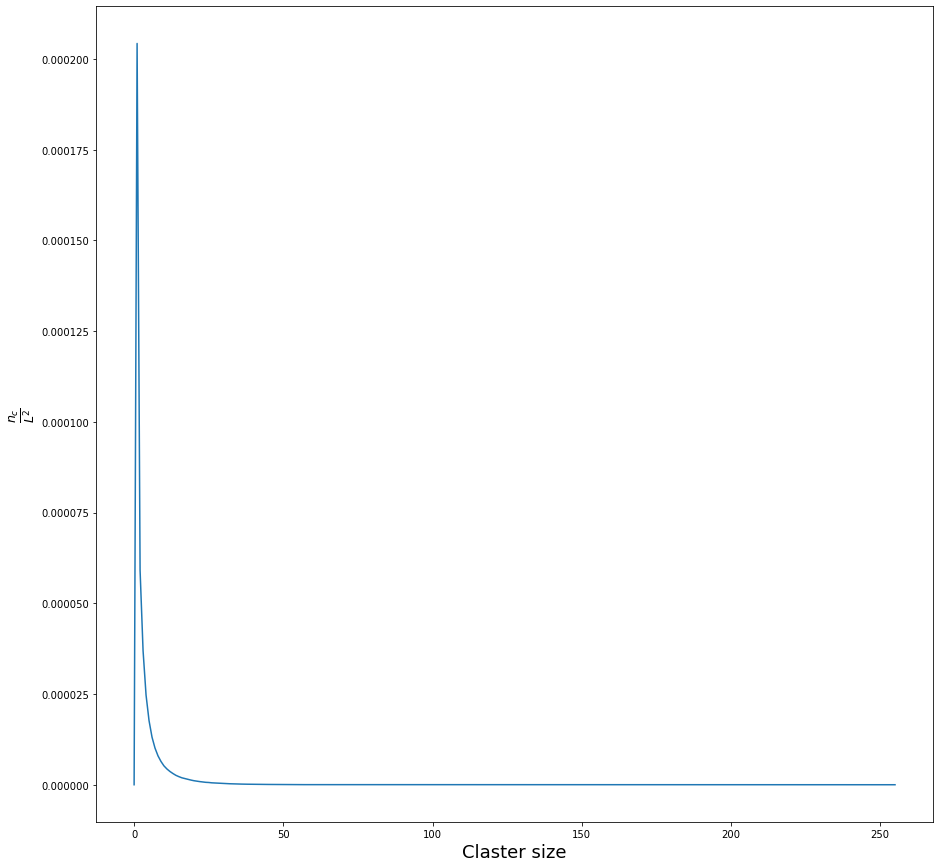

L = 256, Pinf = 0.0, s = 12.050419896938925, p = 0.40000000000000013




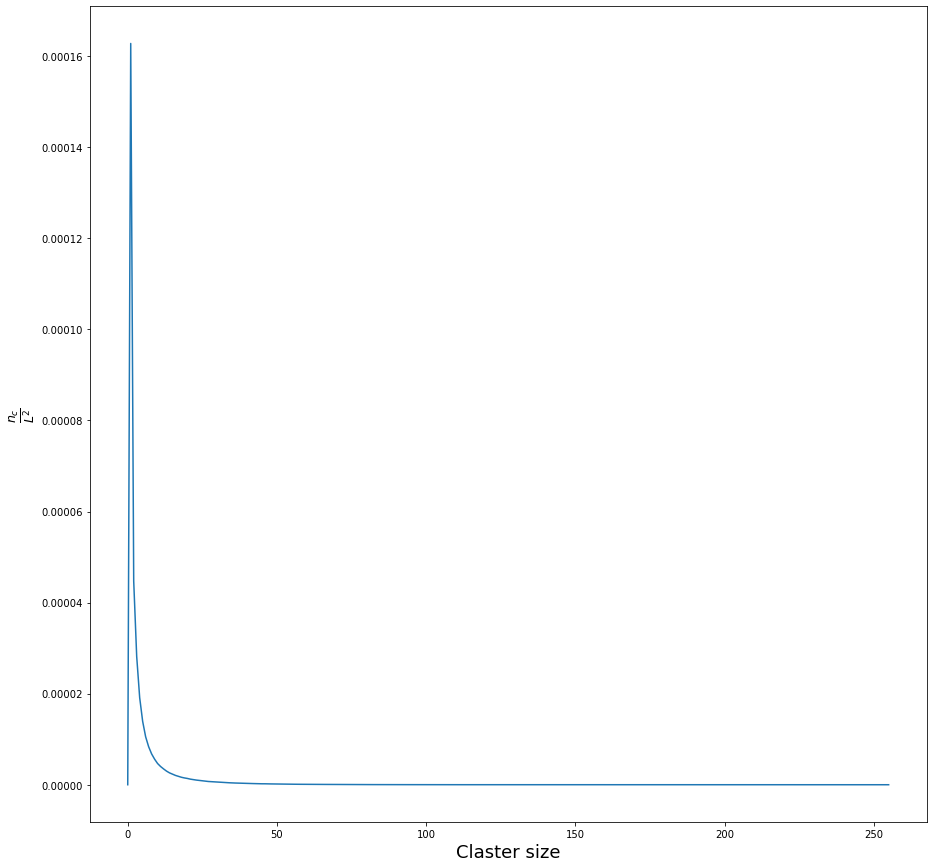

L = 256, Pinf = 0.0, s = 22.62615674552434, p = 0.45000000000000007




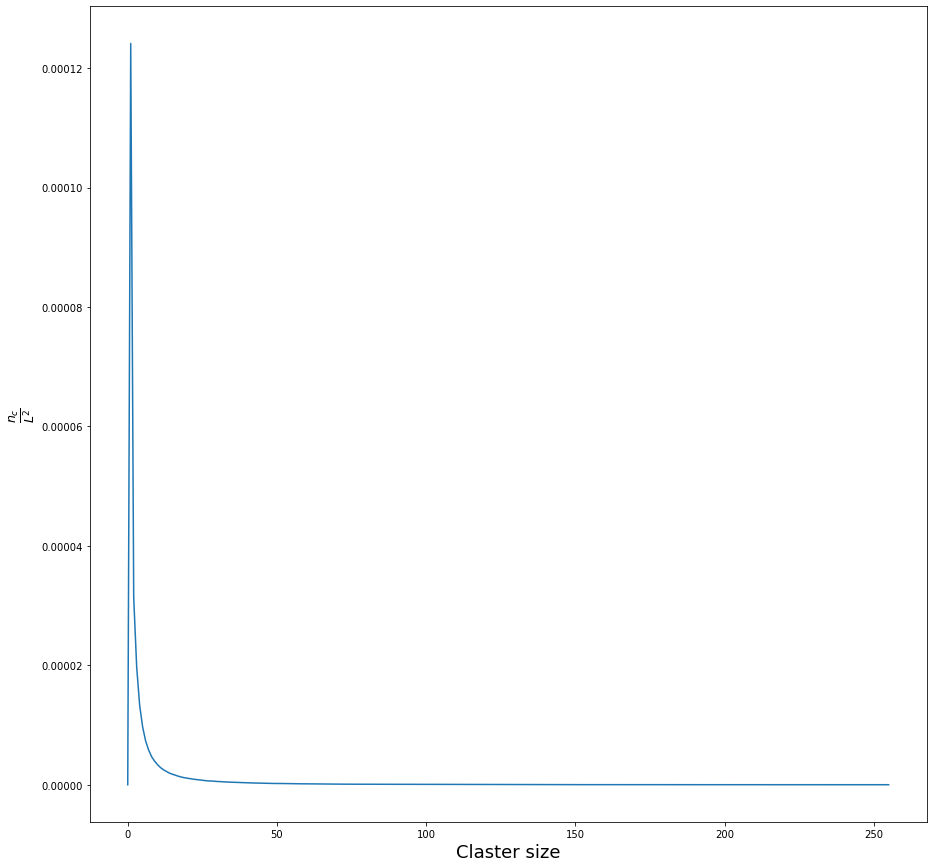

L = 256, Pinf = 0.0, s = 56.62501538847852, p = 0.5000000000000001




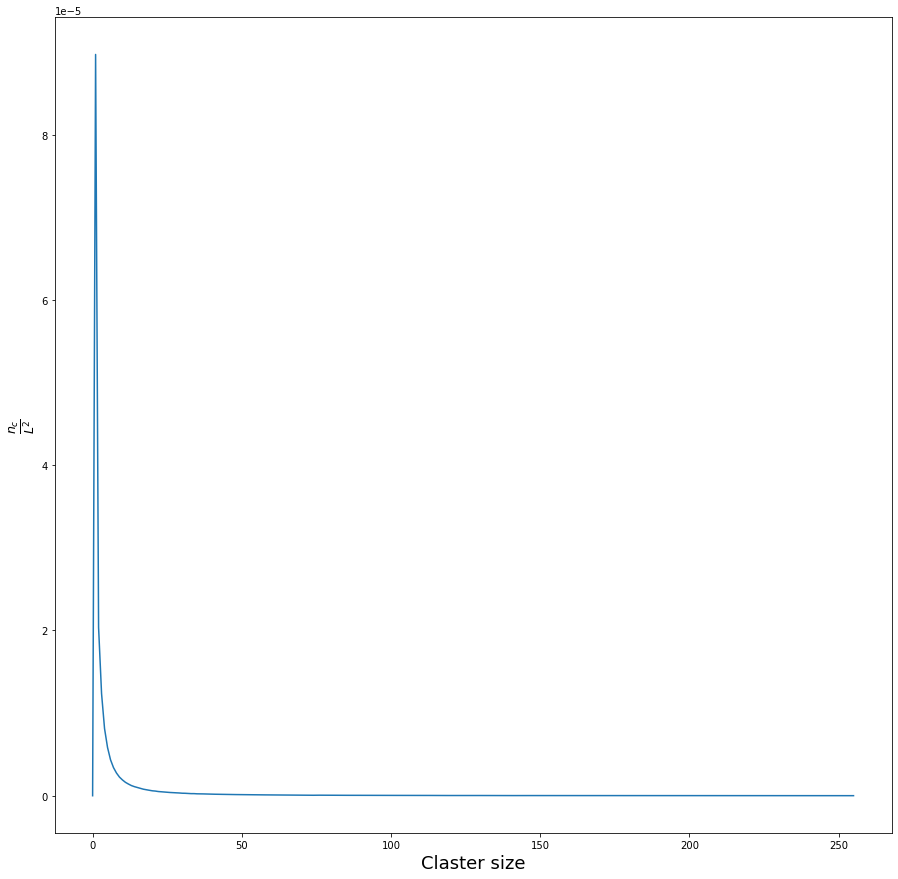

L = 256, Pinf = 0.0, s = 290.5371278028765, p = 0.5500000000000002




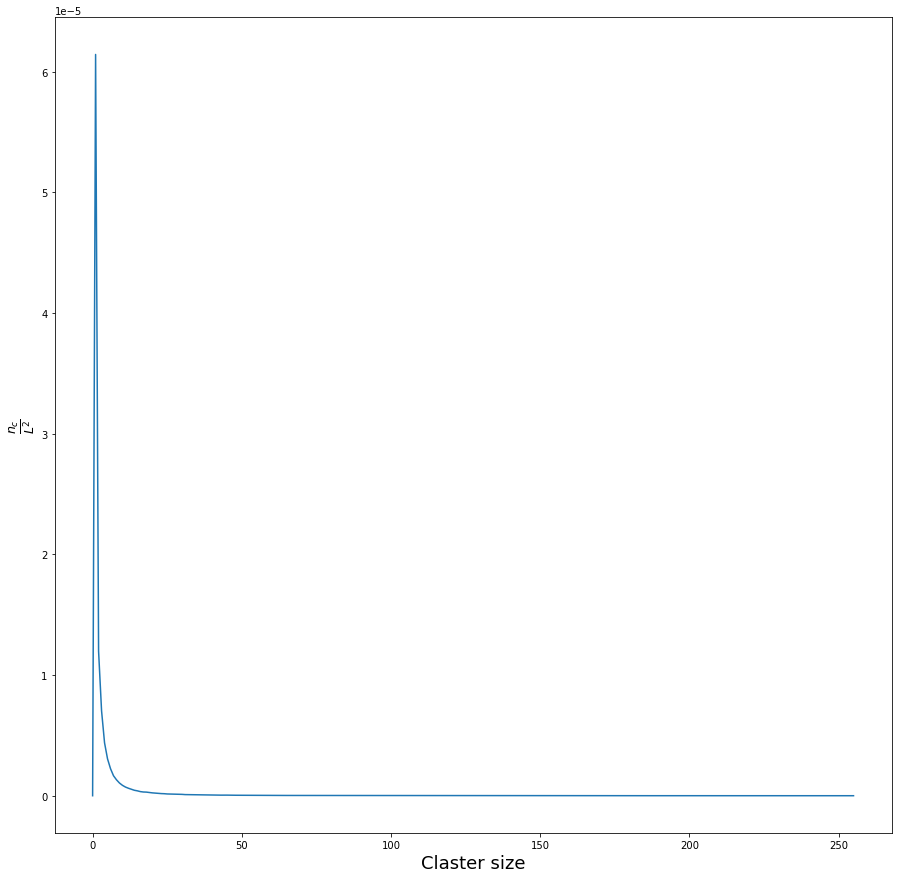

L = 256, Pinf = 0.523866925064433, s = 3820.656176841266, p = 0.6000000000000002




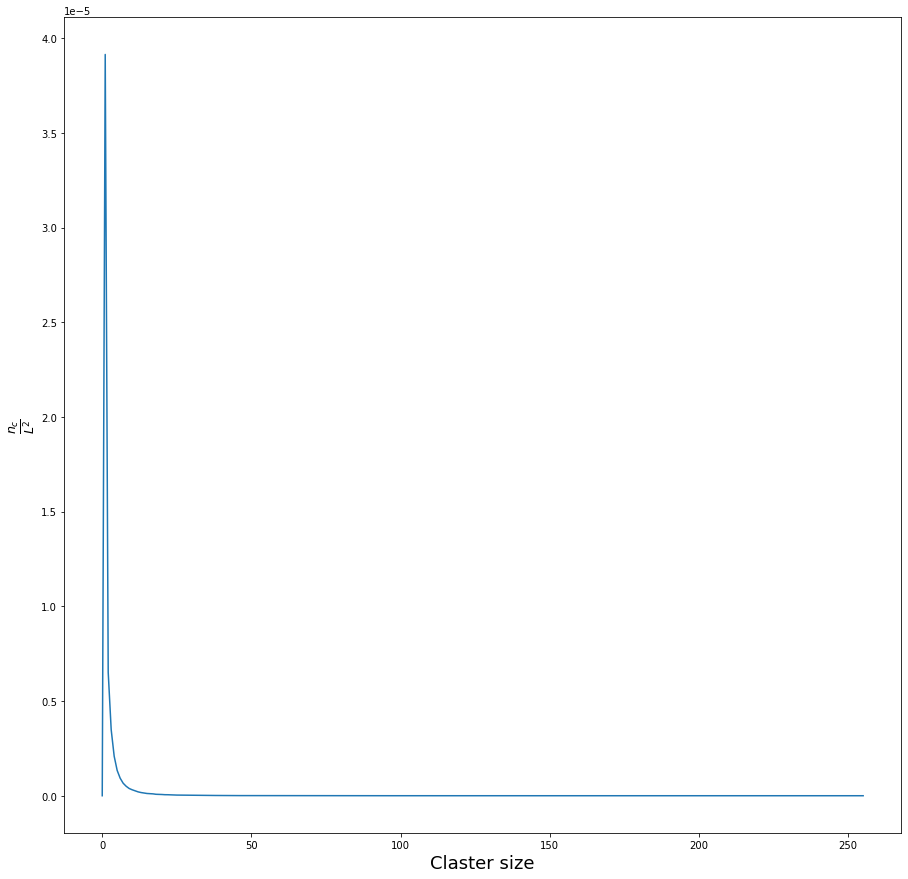

L = 256, Pinf = 0.940197172489653, s = 24.148365149255707, p = 0.6500000000000001




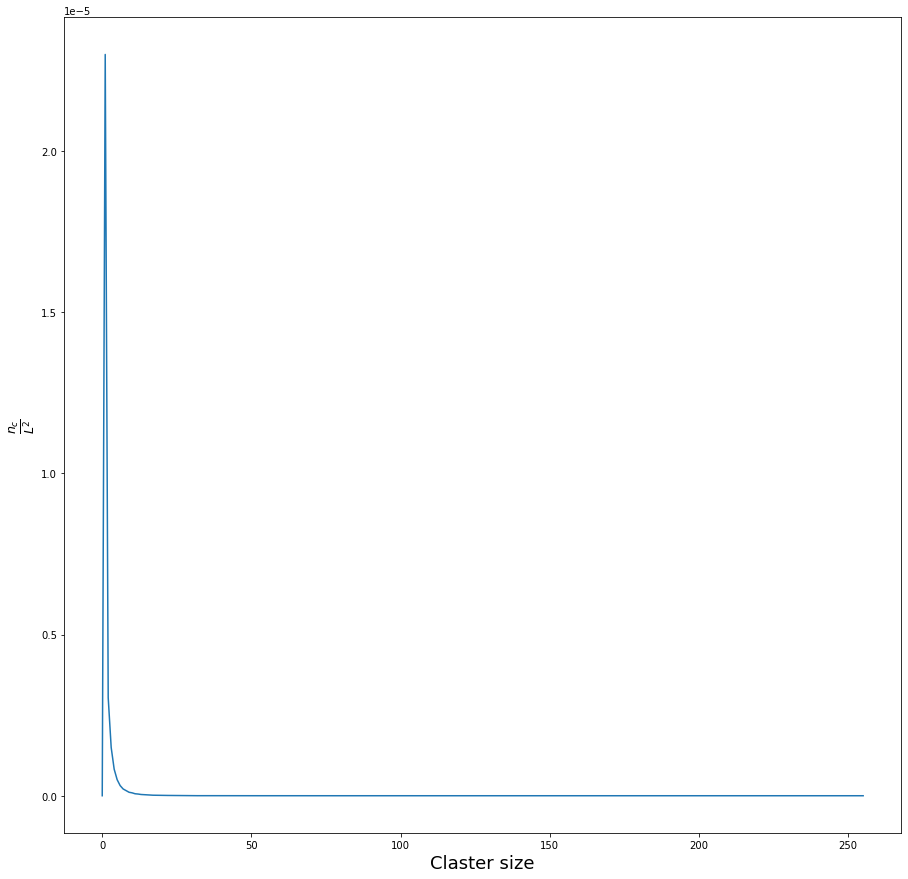

L = 256, Pinf = 0.9805402764067999, s = 6.387756382392351, p = 0.7000000000000002




In [762]:
pArray = np.arange(0.1, 0.71, 0.05);
lPChange = 256;
sArrayPChange = [];
pInfArrayPChange = [];
NsPChang = [];

def pChage():    
    global sArrayPChange;
    global pInfArrayPChange;
    global NsPChang;

    for p in pArray:
        pInf, s, Ns = getValues(lPChange, p);
        Ns = Ns / (lPChange**2);        
        sArrayPChange.append(s);
        pInfArrayPChange.append(pInf);
        NsPChang.append(Ns);


        fig, ax = plt.subplots();
        fig.set_figwidth(15);
        fig.set_figheight(15);
        ax.set_xlabel("Claster size", fontsize=18);    
        ax.set_ylabel("$\\frac{n_c}{L^2}$", fontsize=18);
        ax.plot(np.arange(0, lPChange), Ns[0: lPChange]);
        plt.show();  
        print("L = {}, Pinf = {}, s = {}, p = {}\n\n".format(lPChange, pInf, s, p));

    sArrayPChange = np.array(sArrayPChange);
    pInfArrayPChange = np.array(pInfArrayPChange);

    return;
    
pChage();

L = 256




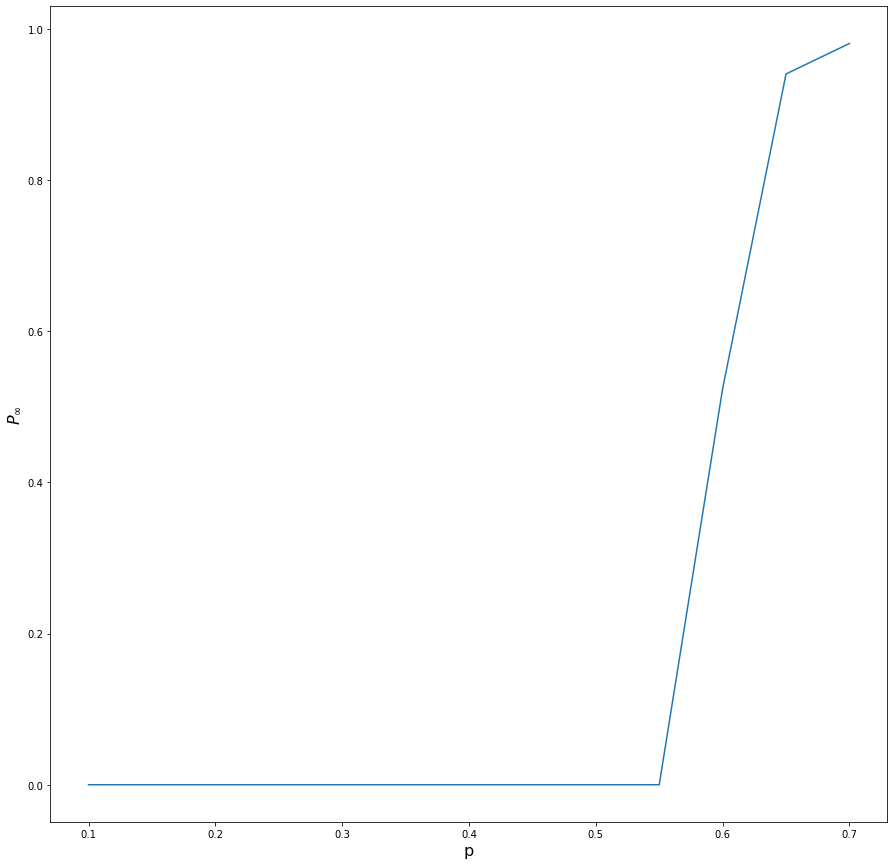

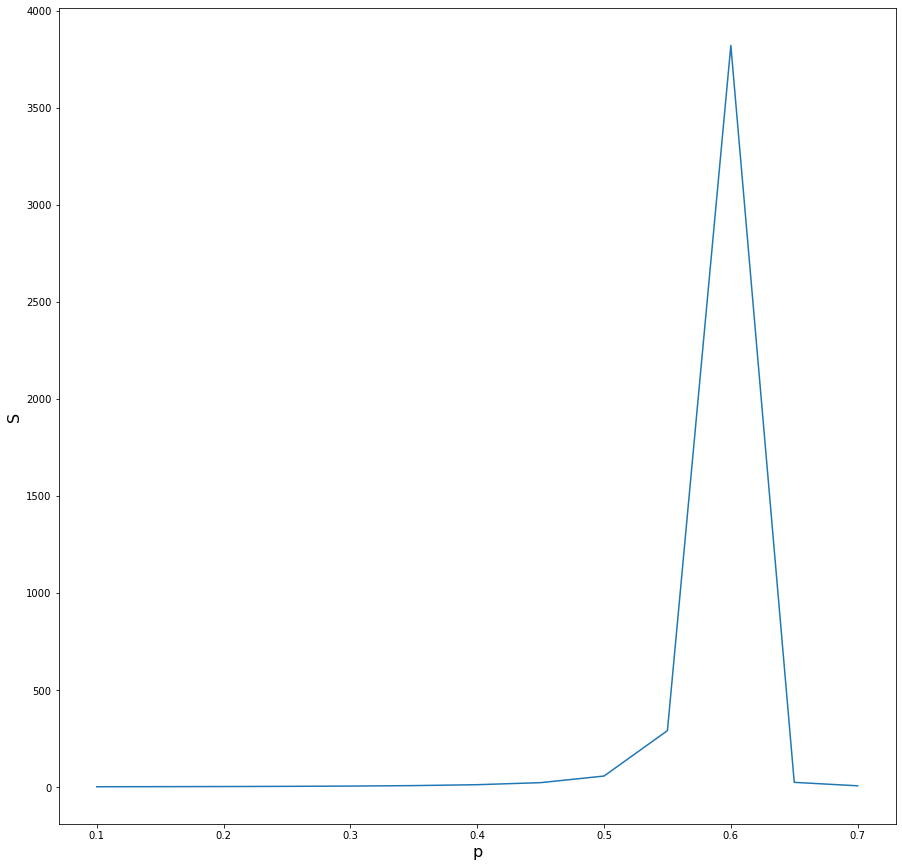

In [763]:
print("L = {}\n\n".format(lPChange));
plt.figure(figsize=(15, 15));
plt.xlabel("p", fontsize=16);
plt.ylabel("$P_{\infty}$", fontsize=16);
plt.plot(pArray, pInfArrayPChange);
plt.figure(figsize=(15,15));
plt.xlabel("p", fontsize=16);
plt.ylabel("S", fontsize=16);
plt.plot(pArray, sArrayPChange);

In [764]:
import xlwt

LChangebook = xlwt.Workbook(encoding="utf-8");
base = LChangebook.add_sheet("Base");
base.write(0, 0, "p");
base.write(0, 1, pLChage);

base.write(2, 0, "L");
base.write(2, 1, "s");
base.write(2, 2, "p_inf");

for i, l in enumerate(lArray):
    base.write(i + 3, 0, str(l));
    base.write(i + 3, 1, sArrayLChange[i]);
    base.write(i + 3, 2, pInfArrayLChange[i]);

for i, NsArray in enumerate(NsLChange):
    sheet = LChangebook.add_sheet("L = " + str(lArray[i]));
    sheet.write(0, 0, "claster size");
    sheet.write(0, 1, "N_s / L^2");
    for j, Ns in enumerate(NsArray):
        if j == 65535:
            break;
        sheet.write(j + 1, 0, j);
        sheet.write(j + 1, 1, Ns);


LChangebook.save("GenFiles/8/LChangebook.xls");

PChangebook = xlwt.Workbook(encoding="utf-8");
base = PChangebook.add_sheet("Base");
base.write(0, 0, "L");
base.write(0, 1, lPChange);

base.write(2, 0, "p");
base.write(2, 1, "s");
base.write(2, 2, "p_inf");

for i, p in enumerate(pArray):
    base.write(i + 3, 0, p);
    base.write(i + 3, 1, sArrayPChange[i]);
    base.write(i + 3, 2, pInfArrayPChange[i]);

for i, NsArray in enumerate(NsPChang):
    sheet = PChangebook.add_sheet("P = " + str(pArray[i]));
    sheet.write(0, 0, "claster size");
    sheet.write(0, 1, "N_s / L^2");
    for j, Ns in enumerate(NsArray):
        if j == 65535:
            break;
        sheet.write(j + 1, 0, j);
        sheet.write(j + 1, 1, Ns);


PChangebook.save("GenFiles/8/PChangebook.xls");